Q2 -----------------------------------------------------------------------------

In [91]:
#Q2
print("--------------------------------------------------------------------------------------------------")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB




--------------------------------------------------------------------------------------------------


Loading the dataset and preprocessing the data

In [92]:
# Step 1: Load the dataset
data = pd.read_csv("onlinefoods.csv")

# Step 2: Pre-Processing
# Drop irrelevant columns
data.drop(columns=['Unnamed: 12'], inplace=True)
data.shape

(388, 12)

Checking for missing values

In [93]:
#checking for null values
data.isnull().sum()


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [94]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


Converting object columns to numerical types.

In [96]:
# Encode categorical variables
encoder = LabelEncoder()
cat_cols = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Feedback']
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])


In [97]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,No Income,2,4,12.9766,77.5993,560001,Yes,1
1,24,0,2,3,Below Rs.10000,0,3,12.9770,77.5773,560009,Yes,1
2,22,1,2,3,Below Rs.10000,2,3,12.9551,77.6593,560017,Yes,0
3,22,0,2,3,No Income,0,6,12.9473,77.5616,560019,Yes,1
4,22,1,2,3,Below Rs.10000,2,4,12.9850,77.5533,560010,Yes,1


In [98]:
data['Output'] = LabelEncoder().fit_transform(data['Output'])
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,No Income,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,Below Rs.10000,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,Below Rs.10000,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,No Income,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,Below Rs.10000,2,4,12.9850,77.5533,560010,1,1


In [99]:
#unique salary classes
data['Monthly Income'].value_counts()

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

Generating classes for target attribute

In [100]:
# Converting 'Monthly Income' to numerical

data["Monthly Income"].replace({"No Income":0},inplace=True)
data["Monthly Income"].replace({"Below Rs.10000":1},inplace=True)
data["Monthly Income"].replace({"10001 to 25000":2},inplace=True)
data["Monthly Income"].replace({"25001 to 50000":3},inplace=True)
data["Monthly Income"].replace({"More than 50000":4},inplace=True)

data.head()



,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,0,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,1,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,1,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,0,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,1,2,4,12.9850,77.5533,560010,1,1


EDA

In [101]:
# Step 3: Exploratory Data Analysis (EDA)
print(data.describe())

              Age      Gender  Marital Status  Occupation  Monthly Income  \
count  388.000000  388.000000      388.000000  388.000000      388.000000   
mean    24.628866    0.572165        1.412371    1.902062        1.469072   
std      2.975593    0.495404        0.895035    1.329722        1.591831   
min     18.000000    0.000000        0.000000    0.000000        0.000000   
25%     23.000000    0.000000        0.000000    0.000000        0.000000   
50%     24.000000    1.000000        2.000000    3.000000        1.000000   
75%     26.000000    1.000000        2.000000    3.000000        3.000000   
max     33.000000    1.000000        2.000000    3.000000        4.000000   

       Educational Qualifications  Family size    latitude   longitude  \
count                  388.000000   388.000000  388.000000  388.000000   
mean                     1.069588     3.280928   12.972058   77.600160   
std                      1.035695     1.351025    0.044489    0.051354   
min       

determining features and target columns

In [102]:
# Step 4: Split the data into training and testing sets
X = data.drop(columns=['Monthly Income'])
y = data['Monthly Income']

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    int64  
 11  Feedback                    388 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 36.5 KB


Splitting the data into train and test dataset

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Testing various models to determine the best one for this dataset

In [105]:
# Step 5: Training various models
models = {
    "Logistic Regression": LogisticRegression(),
    "Perceptron": Perceptron(),
    "MLP": MLPClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB()
}



In [106]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,0,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,1,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,1,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,0,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,1,2,4,12.9850,77.5533,560010,1,1


In [107]:
for name, model in models.items():
    model.fit(X_train, y_train)

# Step 6: Testing the models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy - {accuracy}")


Logistic Regression: Accuracy - 0.5897435897435898
Perceptron: Accuracy - 0.0641025641025641
MLP: Accuracy - 0.5897435897435898
KNN: Accuracy - 0.6410256410256411
SVM: Accuracy - 0.5897435897435898
Naïve Bayes: Accuracy - 0.6666666666666666


In [108]:
# Step 7: Model evaluation
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with accuracy {results[best_model]}")

Best model: Naïve Bayes with accuracy 0.6666666666666666


In [109]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred


array([3, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 3, 2, 0, 4, 1, 0, 4, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 3, 3, 4, 2, 0, 3,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4])

In [110]:
y_test

271    1
46     0
167    0
42     0
349    3
      ..
3      0
18     0
93     0
108    1
255    4
Name: Monthly Income, Length: 78, dtype: int64

In [111]:
print(f"shape of y_pred = {y_pred.shape[0]}\ny_test = {y_test.shape[0]}")

shape of y_pred = 78
y_test = 78


Scatter plot for actual and predicted results

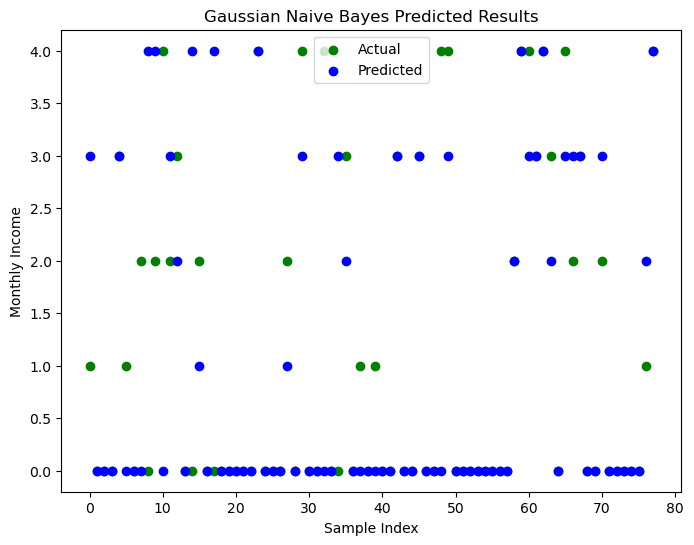

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='blue',label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Monthly Income')
plt.title('Gaussian Naive Bayes Predicted Results')
plt.legend()
plt.show()


F1 score and Accuracy

In [115]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
F1 Score: 0.6900974868586205


Plotting the Confusion matrix

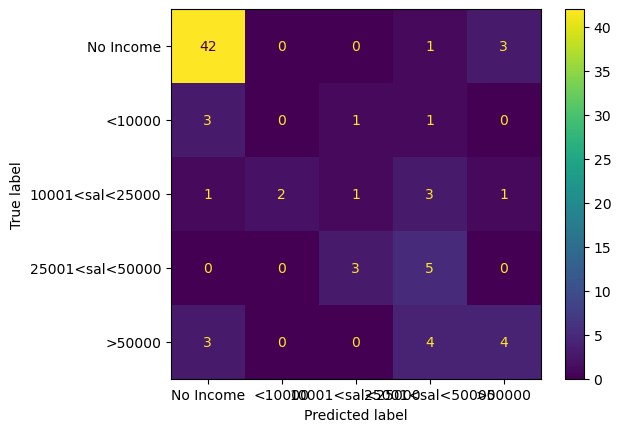

In [128]:

labels = ["No Income","<10000", "10001<sal<25000","25001<sal<50000",">50000"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [117]:
data['Monthly Income'].value_counts()

Monthly Income
0    187
3     69
4     62
2     45
1     25
Name: count, dtype: int64